In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns


%matplotlib inline 

## Bonus will be scattered throughout

In [2]:
url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(url)

response.status_code

200

In [3]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [4]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title.text)

Hall of Fame Members | Country Music Hall of Fame


In [5]:
t = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})

## For loop for grab artist names

In [6]:
artists = []

for element in t:
    name = element.h3.text
    artists.append(name)

# Clean Artist list

In [7]:
artists

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

## Next for Year

In [14]:
x = soup.find_all("div", "vertical-card_content--copy")
x

[<div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2001                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1966                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1973                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1969                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2013                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1999      

# Cleaning up the spaces and newlines. Assigning it to 'year'. 

In [15]:
year = []
for element in x:
    y = element.p.text.strip()
    year.append(y)

print(year)

['Inducted 1962', 'Inducted 2005', 'Inducted 2001', 'Inducted 1966', 'Inducted 1973', 'Inducted 1969', 'Inducted 2005', 'Inducted 2013', 'Inducted 1999']


In [16]:
years = []
for x in year:
    years.append(x.replace('Inducted ',''))
    

In [17]:
years

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

## Bonus, scraping web address

In [18]:
d = soup.find_all('div', class_='vertical-card_content')

In [19]:
web_address = []

for element in d:
    link = element.a['href']
    web_address.append(link)

In [20]:
web_address

['https://countrymusichalloffame.org/artist/roy-acuff/',
 'https://countrymusichalloffame.org/artist/alabama/',
 'https://countrymusichalloffame.org/artist/bill-anderson/',
 'https://countrymusichalloffame.org/artist/eddy-arnold/',
 'https://countrymusichalloffame.org/artist/chet-atkins/',
 'https://countrymusichalloffame.org/artist/gene-autry/',
 'https://countrymusichalloffame.org/artist/deford-bailey/',
 'https://countrymusichalloffame.org/artist/bobby-bare/',
 'https://countrymusichalloffame.org/artist/johnny-bond/']

## Need to add to dataframe with clean lists

In [21]:
hof_dic = {'Year Inducted': years, 'Name': artists, 'Web Address': web_address}
hof_df = pd.DataFrame(hof_dic)
hof_df

,Year Inducted,Name,Web Address
0,1962,Roy Acuff,https://countrymusichalloffame.org/artist/roy-...
1,2005,Alabama,https://countrymusichalloffame.org/artist/alab...
2,2001,Bill Anderson,https://countrymusichalloffame.org/artist/bill...
3,1966,Eddy Arnold,https://countrymusichalloffame.org/artist/eddy...
4,1973,Chet Atkins,https://countrymusichalloffame.org/artist/chet...
5,1969,Gene Autry,https://countrymusichalloffame.org/artist/gene...
6,2005,DeFord Bailey,https://countrymusichalloffame.org/artist/defo...
7,2013,Bobby Bare,https://countrymusichalloffame.org/artist/bobb...
8,1999,Johnny Bond,https://countrymusichalloffame.org/artist/john...


## Now to loop through pages. 
* Needs work

In [22]:
artist_pages = []
year_pages_dirty = []
web_address_pages = []



for i in range(2,17):      # Number of pages plus one, starting on page 2 cause we already did the first page
    url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
    response = requests.get(url + str(i))
    soup = BeautifulSoup(response.content, 'lxml')
    print(url + str(i)) # Watching it print out the url to verify it's working
    
    a = soup.find_all("div", "vertical-card_content--title") # Containter for artists
    c = soup.find_all("div", "vertical-card_content--copy") # Container for year
    d = soup.find_all('div', class_='vertical-card_content') # Container for web address
     
    for element in a: # Going through each of the containers 'a' and adding name to my artist lists
        name = element.h3.text
        artist_pages.append(name)
    
    for element in c: # Going through each of the containers 'c' and adding year to my year lists
        year = element.p.text.strip()
        year_pages_dirty.append(year)

    for element in d: # Going through each of the containers 'd' and adding addresses to my web address lists
        link = element.a['href']
        web_address_pages.append(link)

https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/members/page/16


https://betterprogramming.pub/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper-4e2c641cff8

In [23]:
artist_pages

['Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Harlan Howard',
 'Ferlin Husky',
 'Alan Jackson',
 'Sonny James',
 'Waylon Jennings',
 'George Jones',
 'Grandpa Jones',
 'Jordanaires',
 'Pee 

In [24]:
artist_pages = [a.replace('\u200bJerry Reed', 'Jerry Reed') for a in artist_pages]

In [25]:
year_pages_dirty

['Inducted 2011',
 'Inducted 2006',
 'Inducted 2019',
 'Inducted 1974',
 'Inducted 1987',
 'Inducted 2012',
 'Inducted 2019',
 'Inducted 2015',
 'Inducted 2015',
 'Inducted 1991',
 'Inducted 2005',
 'Inducted 2002',
 'Inducted 1970',
 'Inducted 1980',
 'Inducted 2009',
 'Inducted 2013',
 'Inducted 1973',
 'Inducted 2014',
 'Inducted 1976',
 'Inducted 2003',
 'Inducted 1981',
 'Inducted 2016',
 'Inducted 1972',
 'Inducted 2010',
 'Inducted 2001',
 'Inducted 1966',
 'Inducted 1983',
 'Inducted 2007',
 'Inducted 2001',
 'Inducted 1985',
 'Inducted 2004',
 'Inducted 1967',
 'Inducted 1990',
 'Inducted 2016',
 'Inducted 1967',
 'Inducted 1982',
 'Inducted 1980',
 'Inducted 2001',
 'Inducted 2007',
 'Inducted 2018',
 'Inducted 1994',
 'Inducted 2008',
 'Inducted 2008',
 'Inducted 1966',
 'Inducted 2001',
 'Inducted 1982',
 'Inducted 1997',
 'Inducted 2010',
 'Inducted 2017',
 'Inducted 2006',
 'Inducted 2001',
 'Inducted 1992',
 'Inducted 1978',
 'Inducted 2001',
 'Inducted 1974',
 'Inducted

In [26]:
year_pages = []

for x in year_pages_dirty: # Recycling code from before to clean the years
    year_pages.append(x.replace('Inducted ',''))


In [27]:
year_pages

['2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 '1967',
 '2018',
 '2003',
 '2012',
 '1979',
 '1980',
 '1989',
 '2019',
 '1989',
 '2008',
 '2006',
 '1986',
 '2008',
 

In [28]:
web_address_pages

['https://countrymusichalloffame.org/artist/bobby-braddock/',
 'https://countrymusichalloffame.org/artist/harold-bradley/',
 'https://countrymusichalloffame.org/artist/jerry-bradley/',
 'https://countrymusichalloffame.org/artist/owen-bradley/',
 'https://countrymusichalloffame.org/artist/rod-brasfield/',
 'https://countrymusichalloffame.org/artist/garth-brooks/',
 'https://countrymusichalloffame.org/artist/brooks-dunn/',
 'https://countrymusichalloffame.org/artist/jim-ed-brown/',
 'https://countrymusichalloffame.org/artist/jim-ed-brown-and-the-browns/',
 'https://countrymusichalloffame.org/artist/boudleaux-and-felice-bryant/',
 'https://countrymusichalloffame.org/artist/glen-campbell/',
 'https://countrymusichalloffame.org/artist/bill-carlisle/',
 'https://countrymusichalloffame.org/artist/carter-family/',
 'https://countrymusichalloffame.org/artist/johnny-cash/',
 'https://countrymusichalloffame.org/artist/roy-clark/',
 'https://countrymusichalloffame.org/artist/cowboy-jack-clement/',

## Now just add these lists to the already created data frame

In [29]:
hof_dic = {'Year Inducted': year_pages, 'Name': artist_pages, 'Web Address': web_address_pages}
hof_df2 = pd.DataFrame(hof_dic)
hof_df = hof_df.append(hof_df2, ignore_index = True)

In [30]:
hof_df

,Year Inducted,Name,Web Address
0,1962,Roy Acuff,https://countrymusichalloffame.org/artist/roy-...
1,2005,Alabama,https://countrymusichalloffame.org/artist/alab...
2,2001,Bill Anderson,https://countrymusichalloffame.org/artist/bill...
3,1966,Eddy Arnold,https://countrymusichalloffame.org/artist/eddy...
4,1973,Chet Atkins,https://countrymusichalloffame.org/artist/chet...
...,...,...,...
135,1961,Hank Williams,https://countrymusichalloffame.org/artist/hank...
136,1968,Bob Wills,https://countrymusichalloffame.org/artist/bob-...
137,2014,Mac Wiseman,https://countrymusichalloffame.org/artist/mac-...
138,1998,Tammy Wynette,https://countrymusichalloffame.org/artist/tamm...


In [31]:
hof_df['First Letter'] = hof_df['Name'].str[:1]
hof_df_abc = hof_df.sort_values('First Letter')

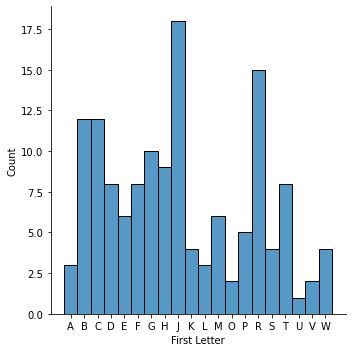

In [32]:
sns.displot(x = 'First Letter', data = hof_df_abc)

## Bonus: Scrape each artist's page, get birthday/death

Lets try to grab web addresses from the inspect element for each page. I will just incorporate it back up in my original code, will just comment out the below work.

In [ ]:
# d = soup.find_all('div', class_='vertical-card_content')
# d

In [ ]:
# web_address = []

# for element in d:
#     link = element.a['href']
#     web_address.append(link)

In [ ]:
# web_address

## Now need to go through each webpage to pull birthday/death